# Part 3: Joining Data

## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3

from utils import export

## Join Part 1 and Part 2 data to create a new dataframe

In [2]:
dirname = '../data/'
stations_df = pd.read_csv(dirname + 'stations_clean.csv', sep=',', index_col=False)
yelp_places_df = pd.read_csv(dirname + 'yelp_places_clean.csv', sep=',', index_col=False)
yelp_categories_df = pd.read_csv(dirname + 'yelp_categories_clean.csv', sep=',', index_col=False)

In [3]:
stations_df.sample(5)

,station_id,name,latitude,longitude,altitude,slots,free_bikes,empty_slots
23,72991751fac2544c78666c0554568ef5,S25 - Plaza de Armas,-33.437118,-70.649512,578.0,18,13,5
91,f9e8b1b5a737986055b0201924ebeae5,LC011 - Metro Hernando De Magallanes,-33.408329,-70.556524,709.0,19,6,13
54,1dfc2cf6a191dda80abb266ead1fc4d3,S09 - Santo Domingo / Morandé,-33.436620,-70.654184,566.0,19,10,9
148,d4eca963247bd7c88276eef1295a563c,LC098 - Cantagallo,-33.373503,-70.518313,810.0,7,4,3
109,44ebcf45bc2f09921966535464f6231b,LC058 - Plaza Horacio Rivarola,-33.421136,-70.570168,667.0,15,14,1


In [4]:
yelp_places_df.sample(5)

,yelp_id,name,review_count,price,rating,distance,station_id
3777,AkPKfH2jTSdWyZgHXJotBA,Restaurant de Comida Peruana Las Américas,1,NaN,3.0,477.714927,0046f093db7125380956ca0bbf51c8bd
6156,D4VeYaSEw9EaNCxqkloL6A,Normandie,12,3.0,3.9,1251.109302,4b67bf22ade79451105e4cbb80e60dc9
9909,GP6fzGX_n8-AEVWkXredcw,Dominó,7,1.0,4.1,1214.010401,781f96b7e332067821ec87a594fb180b
49,Vs8LLb7gguxoW2fmDQrusQ,El Polluelo Amarillo,10,2.0,3.7,812.784903,e1593acef03a0fd770595370586bc358
3413,BdFa1mzW_Hyt3EJ8EqnV1Q,Juan Maestro,1,NaN,5.0,835.862506,961fadb450cb81b500afb4d88241eccc


In [5]:
yelp_categories_df.sample(5)

,yelp_id,category_name
1986,ZSv6Z3QtlNqVz9IHwGEpow,desserts
1507,VtpPlrg60knU_mONrELrBw,food stands
430,_-JGJI8948wEpYAhSjuo-A,italian
924,ctjBMhazaAgUaDul0OCokw,peruvian
2261,pz9SrLHngKMwSYR9MKCHvw,parks


Are there any station_ids that are in `stations_df` but not in `yelp_places_df`? (Spoiler: there shouldn't be!)

In [6]:
station_ids = set(stations_df['station_id'].to_list())
yelp_station_ids = set(yelp_places_df['station_id'].to_list())
station_ids.issubset(yelp_station_ids), yelp_station_ids.issubset(station_ids)

(True, True)

The sets of station_ids in `stations_df` and `yelp_places_df` are equal. Therefore, I'll (inner) merge (*i.e.* SQL join) these two tables on `station_id`. But, first, I'll rename a pair of columns to avoid future confusion.

In [3]:
stations_df.rename({'name': 'station_name'}, axis='columns', inplace=True)
yelp_places_df.rename({'name': 'place_name'}, axis='columns', inplace=True)

In [4]:
stations_places_df = stations_df.merge(yelp_places_df, how='inner', on='station_id')

In [9]:
stations_places_df.sample(5)

,station_id,station_name,latitude,longitude,altitude,slots,free_bikes,empty_slots,yelp_id,place_name,review_count,price,rating,distance
5735,17db4c1637f146f9820d00e8a8a9f656,LC042 - Padre Hurtado / Las Condes,-33.394415,-70.544959,740.0,11,4,6,YSu8SCf9U3xssfysZrR94Q,Al Jazeera,1,NaN,4.0,724.119593
3668,f53dcce8aa6dad42c91ac44153dba370,LC092 - Manquehue Sur / El Director,-33.412750,-70.566300,686.0,11,4,7,aST1yQNM-AfI9HgIjIOwdQ,La Tasca Altamar,8,NaN,4.0,595.998791
5836,8845a95b2ea7a9ccde5110a7dbe6c0b4,S24 - Plaza Yungay,-33.439127,-70.673451,540.0,18,5,13,nD0SDE0k1cHkfAHF0HmYZg,Yahaira,2,1.0,4.5,606.926991
8134,2de9be273aba3e100286c2ad96a1b2ae,LC094 - Sánchez Fontecilla / Martín De Zamora,-33.424679,-70.592277,637.0,7,4,3,PiO0A-NzFTPMOpodH_DsEA,Castaño,1,NaN,5.0,1232.755468
6051,45d51e231d79a803aa7b2d1a41d1fc3f,P45 - Eliodoro Yañez / Holanda,-33.429568,-70.600625,620.0,14,2,11,oZ_pVyyyGS8mghqZ9X_NUw,Baco,71,3.0,4.3,1322.197252


Next, I could merge `stations_places_df` with `yelp_categories_df` on `yelp_id`.

Are there any yelp_ids that are in `stations_places_df` that are not in `yelp_categories_df`? It's certainly possible that there are businesses returned by a Yelp search that don't have any associated categories.

In [5]:
yelp_ids_1 = set(stations_places_df['yelp_id'].to_list())
yelp_ids_2 = set(yelp_categories_df['yelp_id'].to_list())
print(f'num yelp IDs: {len(yelp_ids_1)}, {len(yelp_ids_2)}')
print(f'yelp_ids_2 contained in yelp_ids_1: {yelp_ids_2.issubset(yelp_ids_1)}')
yelp_id_diff = yelp_ids_1 - yelp_ids_2
print('yelp IDs in yelp_id_1 but not in yelp_id_2:')
for id in yelp_id_diff:
    print(f'    {id}')

num yelp IDs: 1756, 1748
yelp_ids_2 contained in yelp_ids_1: True
yelp IDs in yelp_id_1 but not in yelp_id_2:
    JcJrUd2jyEGUCYU99QtkUA
    05SHJ9668PZQXIhMjp9ACA
    B45kBL6rxN7G2udwz2epQw
    S3qk-oT76pT6G_VA4Y4j0w
    JX_Axp2MRPwmDhHUw0hZqw
    pLh6ImLqAWPWNICWUz70Uw
    g79bELS1rZheFdxkXmzKtw
    6XnJsC8OZyLuRoWN9wRmEA


To ensure that I keep all businesses in the final merged DataFrame, I'll left merge stations_places_df to yelp_categories_df. Note that a handful of businesses will have a category_name of NA.

In [74]:
stations_places_cats_df =\
    stations_places_df.merge(yelp_categories_df, how='left', on='yelp_id')

### Look at the data before and after the join to validate your data

In [7]:
stations_places_cats_df.head()

,station_id,station_name,latitude,longitude,altitude,slots,free_bikes,empty_slots,yelp_id,place_name,review_count,price,rating,distance,category_name
0,e1593acef03a0fd770595370586bc358,P31 - Estación Canal 13,-33.428334,-70.627312,599.0,13,6,7,8N6Y3HsLXHBeFwhlO0YxwQ,Barrica 94,78,2.0,4.3,988.631270,wine bars
1,e1593acef03a0fd770595370586bc358,P31 - Estación Canal 13,-33.428334,-70.627312,599.0,13,6,7,8N6Y3HsLXHBeFwhlO0YxwQ,Barrica 94,78,2.0,4.3,988.631270,chilean
2,e1593acef03a0fd770595370586bc358,P31 - Estación Canal 13,-33.428334,-70.627312,599.0,13,6,7,8N6Y3HsLXHBeFwhlO0YxwQ,Barrica 94,78,2.0,4.3,988.631270,cocktail bars
3,e1593acef03a0fd770595370586bc358,P31 - Estación Canal 13,-33.428334,-70.627312,599.0,13,6,7,U15KdCy6HH05WISNtN9plQ,Restaurant Peumayén,73,4.0,4.5,856.161401,latin american
4,e1593acef03a0fd770595370586bc358,P31 - Estación Canal 13,-33.428334,-70.627312,599.0,13,6,7,y2FR-JBGie4wiW6RjtKLhg,Aquí Está Coco,58,4.0,4.3,1099.691315,seafood


In [79]:
print(f'shape: {stations_places_cats_df.shape}')
print(f'columns:\n {stations_places_cats_df.columns}')
stations_places_cats_df.info()

shape: (15212, 15)
columns:
 Index(['station_id', 'station_name', 'latitude', 'longitude', 'altitude',
       'slots', 'free_bikes', 'empty_slots', 'yelp_id', 'place_name',
       'review_count', 'price', 'rating', 'distance', 'category_name'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15212 entries, 0 to 15211
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   station_id     15212 non-null  object 
 1   station_name   15212 non-null  object 
 2   latitude       15212 non-null  float64
 3   longitude      15212 non-null  float64
 4   altitude       15212 non-null  float64
 5   slots          15212 non-null  int64  
 6   free_bikes     15212 non-null  int64  
 7   empty_slots    15212 non-null  int64  
 8   yelp_id        15212 non-null  object 
 9   place_name     15212 non-null  object 
 10  review_count   15212 non-null  int64  
 11  price          10506 non-null  float64
 12  rat

In [14]:
export(stations_places_cats_df, 'stations_places_cats.csv')

### EDA with visualizations

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

#### `stations_df` 

I'll start off easy by looking at the columns of `stations_df` for interesting relationships pertaining to the number of bikes available.

array([[<Axes: title={'center': 'free_bikes'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'altitude'}>],
       [<Axes: title={'center': 'slots'}>,
        <Axes: title={'center': 'empty_slots'}>]], dtype=object)

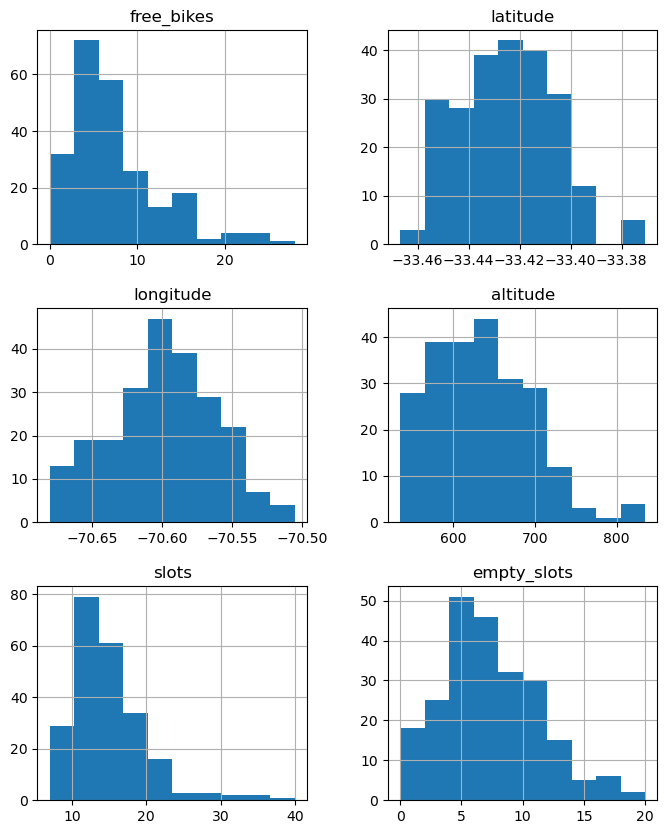

In [35]:
cols = ['free_bikes', 'latitude', 'longitude', 'altitude', 'slots', 'empty_slots']
stations_df[cols].hist(figsize=(8, 10))

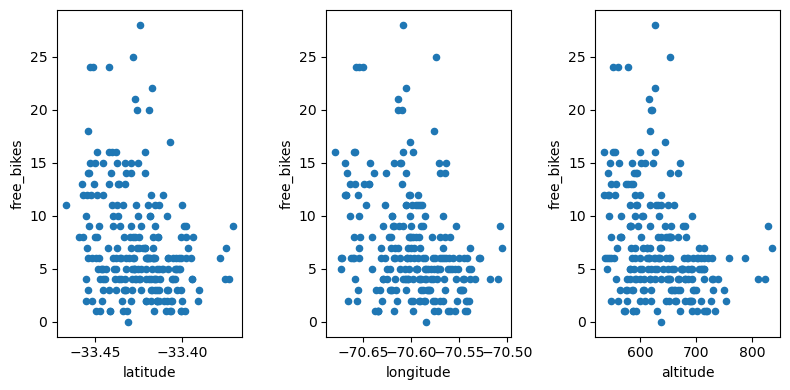

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))
stations_df.plot.scatter(x='latitude', y='free_bikes', ax=axes[0])
stations_df.plot.scatter(x='longitude', y='free_bikes', ax=axes[1])
stations_df.plot.scatter(x='altitude', y='free_bikes', ax=axes[2])
fig.tight_layout()

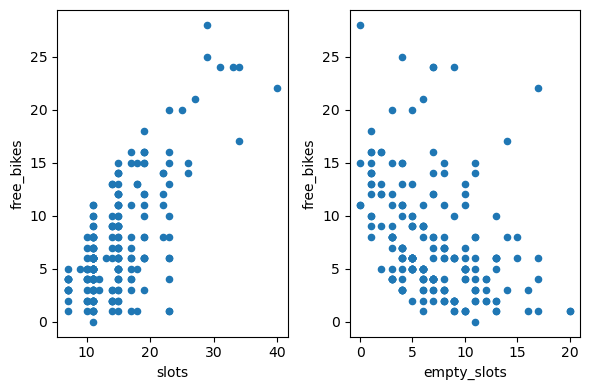

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4))
stations_df.plot.scatter(x='slots', y='free_bikes', ax=axes[0])
stations_df.plot.scatter(x='empty_slots', y='free_bikes', ax=axes[1])
fig.tight_layout()

<Axes: >

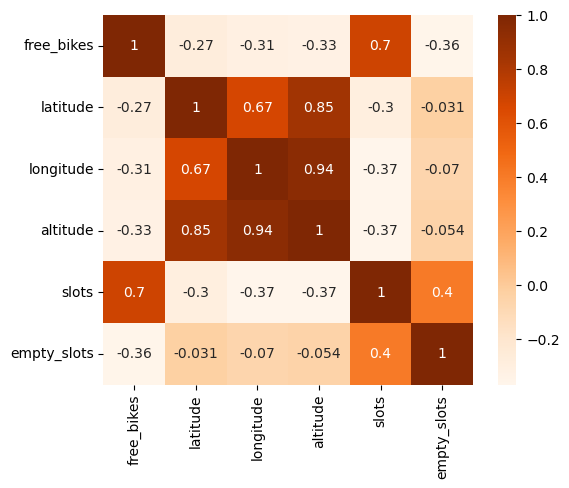

In [47]:
sns.heatmap(stations_df[cols].corr(), annot=True, square=True, cmap='Oranges')

#### Conclusions

Restricting attention to the columns of `stations_df`, the number of free bikes is moderately/strongly correlated with slots suggesting that, at larger bike stations, there is a higher chance of a bike being available. That seems pretty reasonable. I thought there would be a stronger negative correlation between the number of free bikes and altitude: my hunch was that people would be less likely to return bikes to high-altitude bike stations because they didn't want to cycle uphill. That doesn't seem to be the case however.

#### `stations_places_cats_df`

Next, I'll look for nontrivial relationships between the number of free bikes at a station and the number of nearby points of interest. I'll focus on total points of interest as well as total bars and total cafes more specifically.

In [84]:
def is_bar(category: str) -> bool:
    """
    Return True if category corresponds to a bar, False otherwise.

    Usage examples:
    >>> is_bar('dive bar')
    True
    >>> is_bar('korean barbeque')
    False
    """
    if not isinstance(category, str):    
        return False
        
    # search terms that indicate a bar
    bars = ['bar', 'pub', 'wine', 'brewery', 'breweries', 'lounge']

    # search terms that indicate not a bar
    not_bars = ['barbeque']
    
    contains_bar = any([category.find(b) >= 0 for b in bars])
    contains_not_bar = any([category.find(b) >= 0 for b in not_bars])
    return contains_bar and (not contains_not_bar)

In [86]:
def is_cafe(category: str) -> bool:
    """
    Return True if category corresponds to a cafe, False otherwise.

    Usage examples:
    >>> is_cafe('coffe & tea')
    True
    >>> is_cafe('steakhouse')
    False
    """
    if not isinstance(category, str):    
        return False
        
    # search terms that indicate a cafe
    cafes = ['cafe', 'coffee', 'tea']

    # search terms that indicate not a cafe
    not_cafes = ['steakhouse']
    
    contains_cafe = any([category.find(c) >= 0 for c in cafes])
    contains_not_cafe = any([category.find(c) >= 0 for c in not_cafes])
    return contains_cafe and (not contains_not_cafe)

Next, I'll construct a DataFrame with station_id as a primary key and with columns such as number of nearby POIs, number of nearby bars, and number of nearby cafes. Also, I'll include columns for average rating as well. Average prices would also be interesting, but that particular dataset is incomplete.

In [103]:
cols = ['station_id', 'rating', 'category_name']
tmp = stations_places_cats_df[cols]

In [109]:
pois = tmp.groupby(by='station_id')\
    .agg({'rating': 'mean', 'category_name': 'count'})
pois.columns = ['avg_poi_rating', 'num_pois']
pois

,avg_poi_rating,num_pois
station_id,,
0046f093db7125380956ca0bbf51c8bd,4.120455,44
011f0a19d987734f4fb24633312b3a20,4.384810,79
015993172e4f55844cc77b27ce824645,4.264706,68
021a7872f67d0ddb1942e70fd96748c0,4.221053,76
045a970ec28e1118487d0f8306f05486,4.198485,66
...,...,...
f9e8b1b5a737986055b0201924ebeae5,3.906250,63
fbbe822b1160fe03fe11250d373d514d,4.020968,62
fd7cae7b91374275718bc95f6dccd913,4.212346,81


In [114]:
bars = tmp[tmp['category_name'].apply(is_bar)]\
    .groupby(by='station_id')\
    .agg({'rating': 'mean', 'category_name': 'count'})
bars.columns = ['avg_bar_rating', 'num_bars']
bars

,avg_bar_rating,num_bars
station_id,,
0046f093db7125380956ca0bbf51c8bd,4.262500,8
011f0a19d987734f4fb24633312b3a20,4.425000,12
015993172e4f55844cc77b27ce824645,4.000000,4
021a7872f67d0ddb1942e70fd96748c0,4.180000,15
045a970ec28e1118487d0f8306f05486,3.960000,10
...,...,...
f9e8b1b5a737986055b0201924ebeae5,4.087500,8
fbbe822b1160fe03fe11250d373d514d,2.800000,5
fd7cae7b91374275718bc95f6dccd913,4.116667,12


In [115]:
cafes = tmp[tmp['category_name'].apply(is_cafe)]\
    .groupby(by='station_id')\
    .agg({'rating': 'mean', 'category_name': 'count'})
cafes.columns = ['avg_cafe_rating', 'num_cafes']
cafes

,avg_cafe_rating,num_cafes
station_id,,
0046f093db7125380956ca0bbf51c8bd,4.580000,5
011f0a19d987734f4fb24633312b3a20,4.037500,8
015993172e4f55844cc77b27ce824645,4.514286,7
021a7872f67d0ddb1942e70fd96748c0,4.260000,5
045a970ec28e1118487d0f8306f05486,4.266667,6
...,...,...
f9e8b1b5a737986055b0201924ebeae5,4.300000,8
fbbe822b1160fe03fe11250d373d514d,4.437500,8
fd7cae7b91374275718bc95f6dccd913,4.018182,11


In [120]:
del tmp

Next, I'll merge stations_df with pois, bars, and cafes on station_id.

In [161]:
cols = ['station_id', 'station_name', 'free_bikes', 'slots', 'altitude']
stations_trimmed_df = stations_df[cols].copy()
stations_trimmed_df.set_index('station_id', inplace=True)
stations_pois_df = stations_trimmed_df\
    .merge(pois, how='left', left_index=True, right_index=True)\
    .merge(bars, how='left', left_index=True, right_index=True)\
    .merge(cafes, how='left', left_index=True, right_index=True)
stations_pois_df

,station_name,free_bikes,slots,altitude,avg_poi_rating,num_pois,avg_bar_rating,num_bars,avg_cafe_rating,num_cafes
station_id,,,,,,,,,,
e1593acef03a0fd770595370586bc358,P31 - Estación Canal 13,6,13,599.0,4.194872,78,4.130000,20.0,4.140000,5.0
3983dd515589a80338dd44a28f5ec414,V34 - Mestizo,8,23,655.0,3.956250,80,4.092857,14.0,3.992308,13.0
405a3a5ca08c7536d3eb286cf8553025,V10 - Casa Costanera,8,11,653.0,4.166250,80,4.233333,12.0,4.054545,11.0
0e8dfc3f137cb3911bd32f5fd45e0f93,V35 - Municipalidad de Vitacura,9,15,645.0,4.124691,81,4.092857,14.0,3.991667,12.0
bdf4fc889476008ea8c644640f306bbc,V07 - Bicentenario,8,17,646.0,4.147561,82,4.333333,12.0,3.938462,13.0
...,...,...,...,...,...,...,...,...,...,...
a7a6f38754bf5a94c1e4ee73acb9a228,P55 - Pérez Valenzuela,10,11,605.0,4.152381,84,4.158333,12.0,4.422222,9.0
dd858289d4a21b7980dc757bb2c601b6,S20 - Metro Santa Lucía,13,14,575.0,4.251316,76,4.163636,11.0,4.276923,13.0
44ade0a0256e24e59138fc59e919885d,S17 - San Isidro / Santa Isabel,15,26,562.0,4.321538,65,4.220000,10.0,4.400000,11.0


NA entries of num_bars and num_cafes should be filled with 0. NA entries of avg_bar_rating and avg_cafe_rating are already np.nan which is appropriate.

In [165]:
tmp = stations_pois_df[['num_bars', 'num_cafes']].astype('int').copy()
tmp.fillna(0, inplace=True)
stations_pois_df[['num_bars', 'num_cafes']] = tmp
del tmp

In [166]:
stations_pois_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230 entries, e1593acef03a0fd770595370586bc358 to ef753058839a19b60e1e7f614c8bf87f
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   station_name     230 non-null    object 
 1   free_bikes       230 non-null    int64  
 2   slots            230 non-null    int64  
 3   altitude         230 non-null    float64
 4   avg_poi_rating   230 non-null    float64
 5   num_pois         230 non-null    int64  
 6   avg_bar_rating   225 non-null    float64
 7   num_bars         230 non-null    int64  
 8   avg_cafe_rating  229 non-null    float64
 9   num_cafes        230 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 27.9+ KB


In [169]:
stations_pois_df.describe()

,free_bikes,slots,altitude,avg_poi_rating,num_pois,avg_bar_rating,num_bars,avg_cafe_rating,num_cafes
count,230.000000,230.000000,230.000000,230.000000,230.000000,225.000000,230.000000,229.000000,230.000000
mean,7.247826,14.504348,635.330435,4.100735,66.004348,4.028192,7.982609,4.141432,8.995652
std,5.138634,5.352017,59.784215,0.205591,18.783180,0.336655,4.336264,0.381197,4.213202
min,0.000000,7.000000,535.000000,3.200000,2.000000,2.800000,0.000000,2.500000,0.000000
25%,4.000000,11.000000,589.250000,4.020057,65.000000,3.900000,5.000000,4.050000,6.000000
50%,6.000000,14.000000,630.000000,4.156477,73.000000,4.044444,7.000000,4.250000,9.000000
75%,9.750000,17.000000,676.500000,4.230338,78.000000,4.220000,11.000000,4.375000,12.000000
max,28.000000,40.000000,835.000000,4.750000,89.000000,5.000000,23.000000,4.750000,20.000000


In [170]:
export(stations_pois_df, 'stations_pois.csv')

array([[<Axes: title={'center': 'avg_poi_rating'}>,
        <Axes: title={'center': 'num_pois'}>],
       [<Axes: title={'center': 'avg_bar_rating'}>,
        <Axes: title={'center': 'num_bars'}>],
       [<Axes: title={'center': 'avg_cafe_rating'}>,
        <Axes: title={'center': 'num_cafes'}>]], dtype=object)

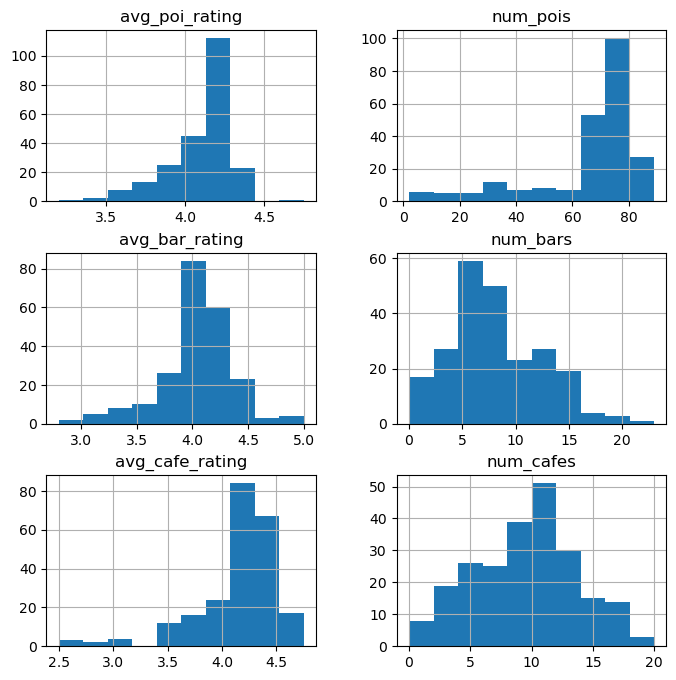

In [175]:
cols = ['avg_poi_rating', 'num_pois', 'avg_bar_rating', 'num_bars', 'avg_cafe_rating', 'num_cafes']
stations_pois_df[cols].hist(figsize = (8, 8))

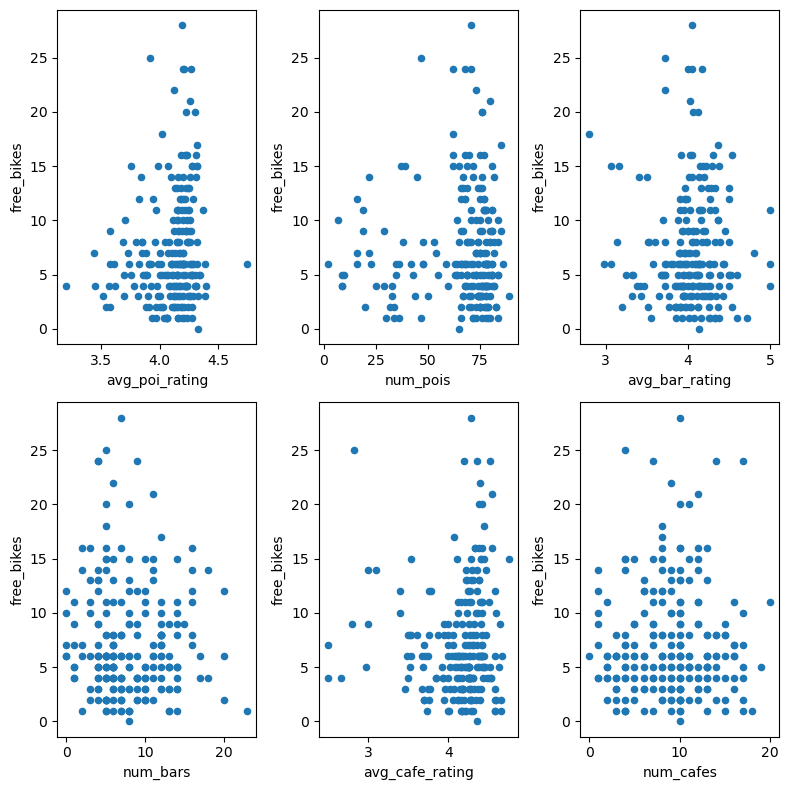

In [182]:
nrows = 2 
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 8))
num_axes = nrows * ncols
for idx in range(len(cols)):
    r = idx // ncols
    c = idx % ncols
    stations_pois_df.plot.scatter(x=cols[idx], y='free_bikes', ax=axes[r][c])
fig.tight_layout()

<Axes: >

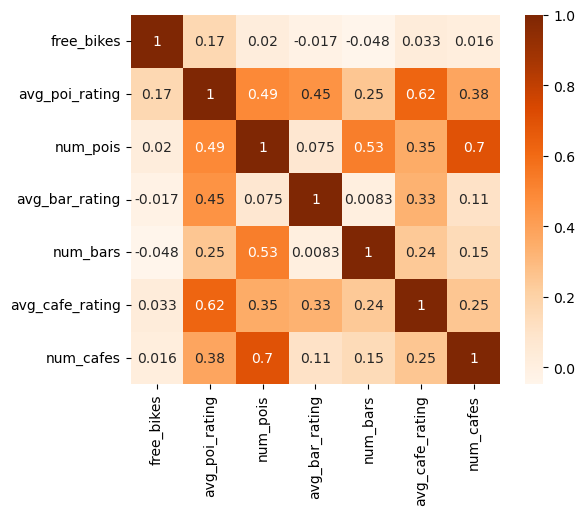

In [187]:
corr_df = stations_pois_df[['free_bikes'] + cols].corr()
sns.heatmap(corr_df, annot=True, square=True, cmap='Oranges')

# Database

### Put results in an SQLite database

In choosing which results to put into a SQL database, I chose the largely raw data from stations_places_categories_df rather than the more processed stations_dois_df. You can always redo data processing, but, generally, you can't undo aggregations and/or data drops. 

In [15]:
# Define a SQLite connection and cursor.
# Note that dirname was defined above.
con = sqlite3.connect(dirname + 'stations_places_cats.db')
cur = con.cursor()

In [16]:
stations_places_cats_df.dtypes

station_id        object
station_name      object
latitude         float64
longitude        float64
altitude         float64
slots              int64
free_bikes         int64
empty_slots        int64
yelp_id           object
place_name        object
review_count       int64
price            float64
rating           float64
distance         float64
category_name     object
dtype: object

In [17]:
# Define the SQLite table creation command before executing it.
sql_create_cmd = r"""
    CREATE TABLE stations_places_cats (
        station_id TEXT,
        station_name TEXT,
        latitude REAL,
        longitude REAL,
        altitude REAL,
        slots INTEGER,
        free_bikes INTEGER,
        empty_slots INTEGER,
        yelp_id TEXT,
        place_name TEXT,
        review_count INTEGER,
        price REAL,
        rating REAL,
        distance REAL,
        category_name TEXT
    );
"""
print(sql_create_cmd)


    CREATE TABLE stations_places_cats (
        station_id TEXT,
        station_name TEXT,
        latitude REAL,
        longitude REAL,
        altitude REAL,
        slots INTEGER,
        free_bikes INTEGER,
        empty_slots INTEGER,
        yelp_id TEXT,
        place_name TEXT,
        review_count INTEGER,
        price REAL,
        rating REAL,
        distance REAL,
        category_name TEXT
    );



In [18]:
cur.execute('DROP TABLE IF EXISTS stations_places_cats')
cur.execute(sql_create_cmd)

In [19]:
res = cur.execute('SELECT name FROM sqlite_master')
res.fetchone()

('stations_places_cats',)

I've successfully created a database. But it's empty. To fill it:

In [20]:
def sql_insert_cmd(df: pd.DataFrame, db: str, row: int) -> str:
    """
    Return the SQL command that will insert a DataFrame row into the database.
    """
    row_list = df.loc[row, :].to_list()
    row_str = str(row_list).replace('nan', 'NULL').replace('[', '(').replace(']', ')')
    return 'INSERT INTO ' + db + ' VALUES ' + row_str

In [21]:
for row in range(stations_places_cats_df.shape[0]):
    sql_cmd = sql_insert_cmd(stations_places_cats_df, 'stations_places_cats', row)
    cur.execute(sql_cmd)

In [22]:
con.commit()

I'll verify that inserting into the database woked as expected.

In [23]:
res = cur.execute('SELECT * FROM stations_places_cats')
records = res.fetchall()
print(f'num rows: {len(records)}, num cols: {len(records[0])}')
records[0]

num rows: 15212, num cols: 15


('e1593acef03a0fd770595370586bc358',
 'P31 - Estación Canal 13',
 -33.428334,
 -70.627312,
 599.0,
 13,
 6,
 7,
 '8N6Y3HsLXHBeFwhlO0YxwQ',
 'Barrica 94',
 78,
 2.0,
 4.3,
 988.6312698678696,
 'wine bars')

Phew!